[](https://matplotlib.org/_static/logo2_compressed.svg)

[]('https://matplotlib.org/_static/logo2_compressed.svg')

![](https://matplotlib.org/_static/logo2_compressed.svg)

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

https://matplotlib.org/

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Matplotlib basic plotting

A MATLAB-like plotting framework: `pyplot`

Also known as the "state-machine environment" because we can call methods of a global state machine and they will affect the appropiate objects.

## Lines

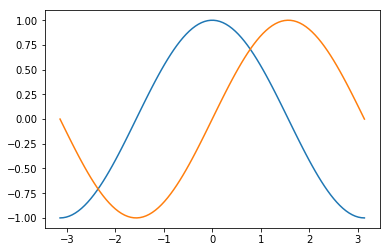

In [18]:
x = np.linspace( -np.pi, np.pi, 100)
c, s = np.cos(x), np.sin(x)

plt.plot(x, c);
plt.plot(x, s);


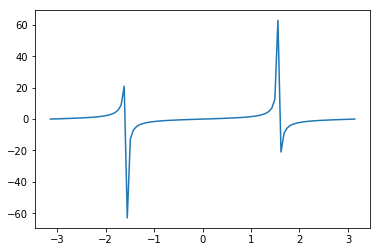

In [19]:
plt.plot(x, s/c);

__Exercise__

Plot the logistic function:
    $$ f(x) = \frac{e^x}{1 + e^x}$$
between (-7,7)

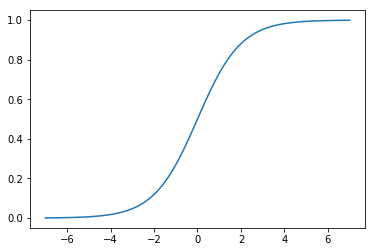

In [20]:
n = 100
x = np.linspace (-7, 7, n)
y = np.exp(x) / (1 + np.exp(x))

plt.plot(x, y);

## Scatter plots

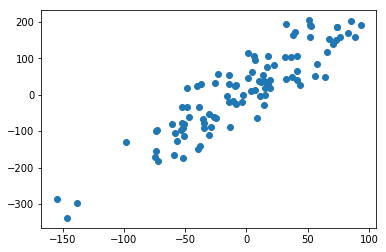

In [21]:
true_theta_0 = 20
true_theta_1 = 2

x = (np.random.randn(100)) * 50
jitter = 50 * np.random.randn(100)
y = true_theta_0 + true_theta_1 * x
y_randomized = y + jitter

plt.scatter(x, y_randomized);

And this happens if you plot a line of unsorted data.

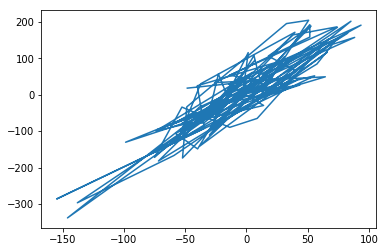

In [22]:
plt.plot(x, y_randomized);

In [23]:
def generate_points(true_theta_0 = 2, true_theta_1 = 5):
    
    x = (np.random.randn(100)) * 50
    jitter = 50 * np.random.randn(100)
    y = true_theta_0 + true_theta_1 * x
    y_randomized = y + jitter
    
    return x, y_randomized


__Exercise__

Let's draw a circle using a scatter plot, afterwards fill it.

$$r^2 = sen(\phi)^2 + cos(\phi)^2$$

$$x=r \cdot cos(\phi)$$
$$y=r \cdot sin(\phi)$$


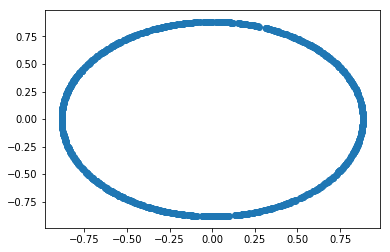

In [24]:
n = 1000
angle = 2 * np.pi * np.random.random(n)
radius = np.random.random()
x = radius * np.cos(angle)
y = radius * np.sin(angle)

plt.scatter(x, y);

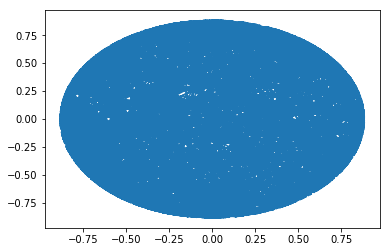

In [25]:
plt.plot(x, y);

## Bar plots

A bar plot is a plot that presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. The bars can be plotted vertically or horizontally.

A bar plot shows comparisons among discrete categories. One axis of the plot shows the specific categories being compared, and the other axis represents a measured value.

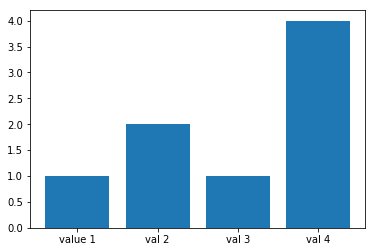

In [26]:
x = [1, 2, 1, 4]
y = ['value 1', 'val 2', 'val 3', 'val 4']

plt.bar(range(len(x)), x);
plt.xticks(np.arange(len(x)), y);
plt.show()

And horizontal with `barh`

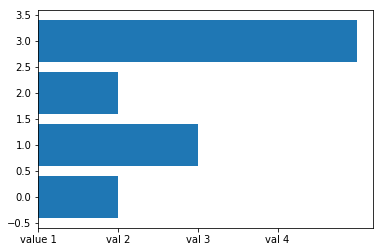

In [27]:
x = [1, 2, 1, 4]
y = ['value 1', 'val 2', 'val 3', 'val 4']

plt.barh(range(len(x)), x);
plt.xticks(np.arange(len(x)), y);
plt.show()

## Histogram

A histogram is an approximate representation of the distribution of numerical data.

To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent, and are often (but not required to be) of equal size

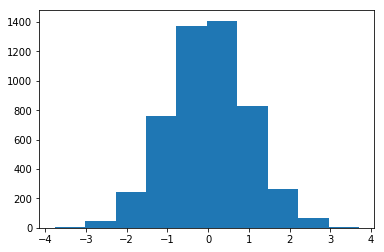

In [28]:
x_normal = np.random.normal(size=5000)
plt.hist(x_normal);

In [29]:
plt.hist(X_normal,density=True,bins=50);

NameError: name 'X_normal' is not defined

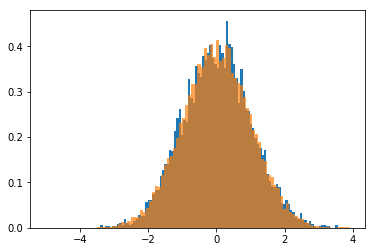

In [30]:
x_normal = np.random.normal(size = 5000)
y_normal = np.random.normal(size = 25000)

plt.hist(x_normal, bins = 100, density = True, alpha = 1);
plt.hist(y_normal, bins = 100, density = True, alpha = .7);

## The object-oriented interface

The recommended procedure is to use pyplot to create figures and the object-oriented interface for plotting. 

![Anatomy of a Matplotlib Figure](http://matplotlib.org/_images/anatomy1.png)

### Figure

A whole figure which may contain several Axes. It communicates with the `Canvas` for us.
Is the object that keeps the whole image output.

In [31]:
fig = plt.figure()  # an empty figure with no axes


<Figure size 432x288 with 0 Axes>

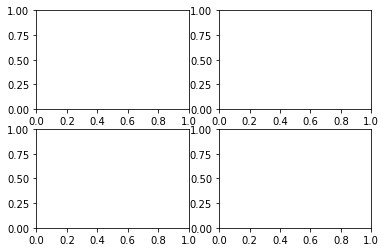

In [32]:
fig, ax = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

### Artists


There are two types of Artists: primitives and containers. The primitives represent the standard graphical objects we want to paint onto our canvas: Line2D, Rectangle, Text, AxesImage, etc., and the containers are places to put them (Axis, Axes and Figure).


https://matplotlib.org/tutorials/intermediate/artists.html

### Axes vs. Axis

An `Axes` (yes, it looks like a plural noun but it's not, necessarily) is a single panel of a figure. An `Axes` contains generally 2, but sometimes 3 `Axis` of a single plot. It is the object type we'll spend most time interacting with.

`Axis` objects represent the lines in the x and y (and z in the case of 3D plots) dimensions. With them you can control ticks and ticklabels.



## Recommended interface

In [33]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph

    Parameters
    ----------
    ax : Axes
        The axes to draw to

    data1 : array
       The x data

    data2 : array
       The y data

    param_dict : dict
       Dictionary of kwargs to pass to ax.plot

    Returns
    -------
    out : list
        list of artists added
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

## Add_axes, add_subplot and subplots

We can add Axes to a Figure by calling its add_axes method.

A subplot is just an Axes that we place within an imaginary grid.

For even finer control we can use [GridSpec](http://matplotlib.org/api/gridspec_api.html)

### Add_axes

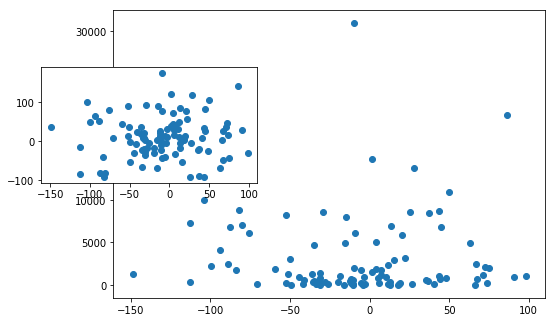

In [34]:
x, y = generate_points(20, 0.2)

figure = plt.figure(figsize = (10, 8))
axes = figure.add_axes([0.2, 0.4, 0.6, 0.5])
axes.scatter(x, y ** 2)

axes2 = figure.add_axes([0.1, 0.6, 0.3, 0.2])
axes2.scatter(x, y)

plt.show()

### Subplots

We can add them with either `figure.add_subplot()` or create a figure with its subplots directly by calling `plt.subplots()`

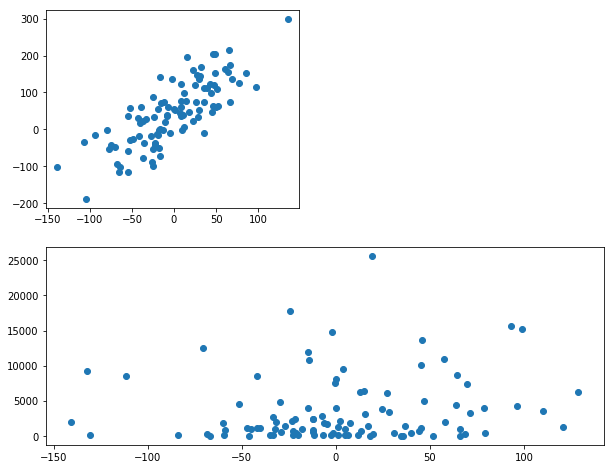

In [35]:
X1, Y1 = generate_points(50, 1.5)
X2, Y2 = generate_points(20, 0.2)
Y2_square = Y2 ** 2

figure = plt.figure(figsize=(10,8))

subplot_1 = figure.add_subplot(2,2,1)
subplot_1.scatter(X1, Y1)

subplot_2 = figure.add_subplot(2,1,2)
subplot_2.scatter(X2, Y2_square)

plt.show()

### Figure.subplots

<class 'numpy.ndarray'> (2, 2)


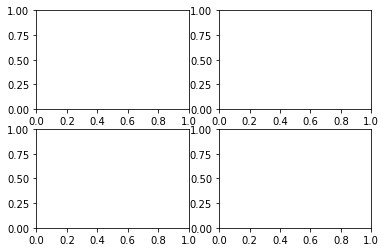

In [36]:
figure, axes = plt.subplots(2, 2)
print(type(axes), axes.shape)

In [37]:
axes.shape

(2, 2)

In [38]:
type(figure)

matplotlib.figure.Figure

In [39]:
ax_ = axes[0, 0]
ax_

In [40]:
figure.dpi

72.0

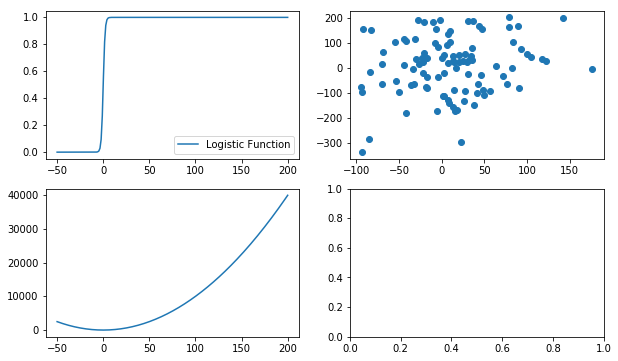

In [41]:
figure, axeses = plt.subplots(2,2)

X_2 = np.linspace(-50, 200, 200)
Y_2 = 1 / (1 + np.exp(-X_2))

axeses[0,0].plot(X_2, Y_2)
axeses[0,1].scatter(y, y_randomized)
#     axeses[0,1].plot(X2, Y2, c='blue')
axeses[1,0].plot(X_2, X_2 ** 2)
#        axeses[1,1].plot(X2, X2)

figure.set_size_inches(10,6)
axeses[0,0].legend(['Logistic Function']);

### Sharing axis

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


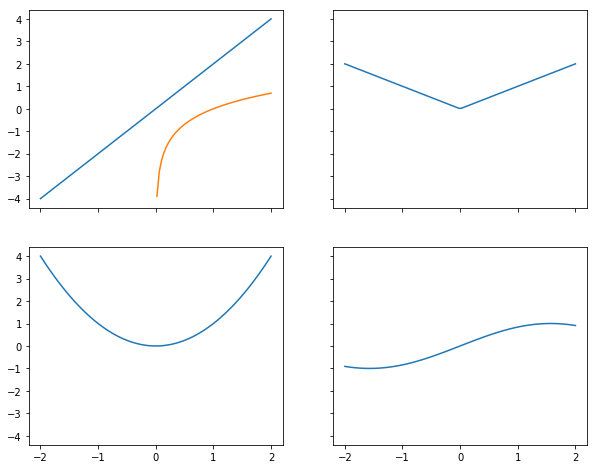

In [42]:
X = np.linspace(-2, 2, 100)

figure, axes_array = plt.subplots(2,2, sharex=True, sharey=True)
figure.set_size_inches(10,8)

# Linear and Log
axes_array[0,0].plot(X, 2*X)
axes_array[0,0].plot(X, np.log(X))

# Abs
axes_array[0,1].plot(X, np.abs(X))

# Square
axes_array[1,0].plot(X, X ** 2)

# Sin
axes_array[1,1].plot(X, np.sin(X))

plt.show()

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


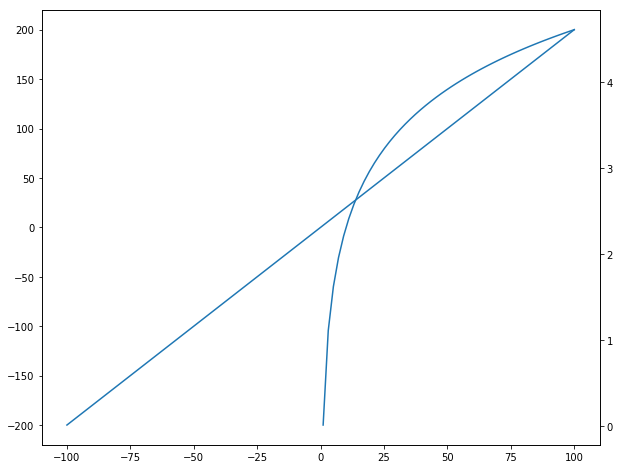

In [43]:
X = np.linspace(-100, 100, 100)

fig, ax = plt.subplots(figsize=(10,8))

ax2= ax.twinx()
# Linear and Log
ax.plot(X, 2*X)
ax2.plot(X, np.log(X));

__Gridspec__

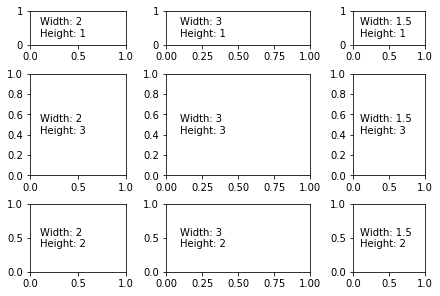

In [44]:
fig = plt.figure(constrained_layout=True)
widths = [2, 3, 1.5]
heights = [1, 3, 2]
spec5 = fig.add_gridspec(ncols=3, nrows=3, width_ratios=widths,
                          height_ratios=heights)
for row in range(3):
    for col in range(3):
        ax = fig.add_subplot(spec5[row, col])
        label = 'Width: {}\nHeight: {}'.format(widths[col], heights[row])
        ax.annotate(label, (0.1, 0.5), xycoords='axes fraction', va='center')

## Fill_between

We can fill areas of the plot with solid color. The syntax is: 

```python
plt.fill_between(X, Y1, Y2)
```

where Y1 and Y2 are either `np.array`s or scalar values.

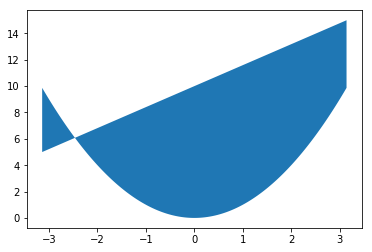

In [45]:
n = 256
x = np.linspace(-np.pi, np.pi, n)
y1 = np.linspace(5, 15, n)
y2 = x ** 2

plt.fill_between(x, y1, y2)
plt.show()

### `where`

We can fill areas of the plot with solid color differently in different parts of the graph. The syntax is: 

```python
plt.fill_between(X, Y1, Y2, where=boolean_array)
```

Where Y1 and Y2 are either `np.array`s or scalar values, and boolean_array can be constructed from X, from Y, or from whatever you want.

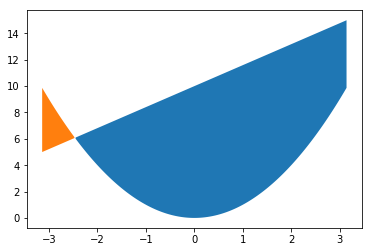

In [46]:
n = 256
x = np.linspace(-np.pi, np.pi, n)
y1 = np.linspace(5, 15, n)
y2 = x ** 2

plt.fill_between(x, y1, y2, where = y1 > y2)
plt.fill_between(x, y1, y2, where = y1 < y2)
plt.show()

__Exercise__

Given this code:
```python
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

plt.plot (X, Y+1, color='blue', alpha=1.00)
plt.plot (X, Y-1, color='blue', alpha=1.00)
plt.show()
```

Reproduce this plot:

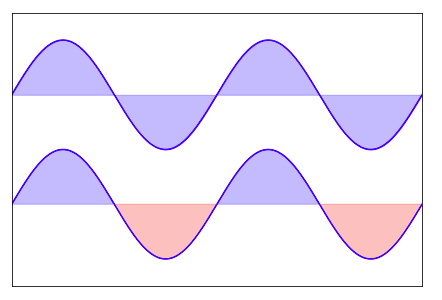

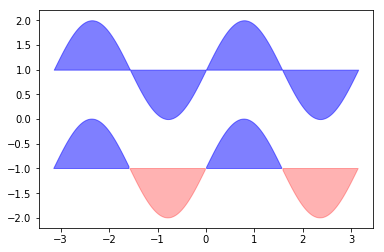

In [47]:
n = 256
X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)

#plt.plot (X, Y+1, color='blue', alpha=1.00)
#plt.plot (X, Y-1, color='blue', alpha=1.00)
#plt.show()


plt.fill_between(X,Y+1,1, color = 'blue', alpha = 0.5)
plt.fill_between(X,Y-1,-1, color = 'blue', where = Y>0, alpha = 0.5)
plt.fill_between(X,Y-1,-1, color = 'red', where = Y<0, alpha = 0.3)


## Line properties

### Color

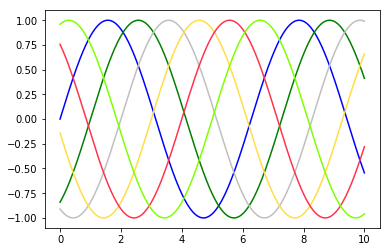

In [48]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

https://matplotlib.org/tutorials/colors/colormaps.html

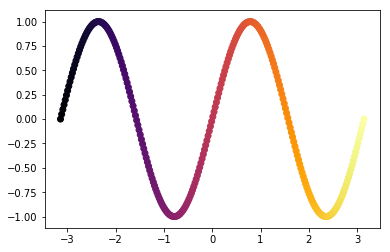

In [49]:
from matplotlib import cm

X = np.linspace(-np.pi,np.pi,n,endpoint=True)
Y = np.sin(2*X)
cmap = cm.get_cmap('inferno')

plt.scatter(X,Y,c=X,cmap=cmap);

__Exercise__


Given this code, try to reproduce this graphic taking care of marker size, color and transparency.

```python
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

plt.scatter(X,Y)
plt.show()
```

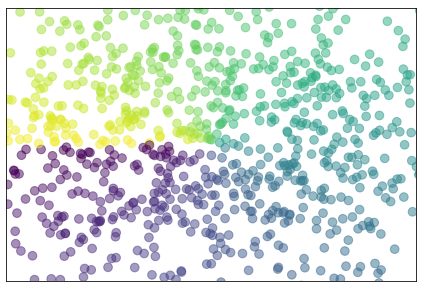

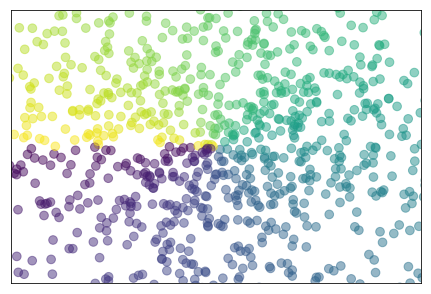

In [145]:
n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)
T = np.arctan2(Y,X)

plt.axes([0.025,0.025,0.95,0.95])
plt.scatter( X,Y, s=  75, c=T, alpha=.5 )

plt.xlim(-1.5,1.5), plt.xticks([])
plt.ylim(-1.5,1.5), plt.yticks([])

plt.show()

### Markers and linestyles

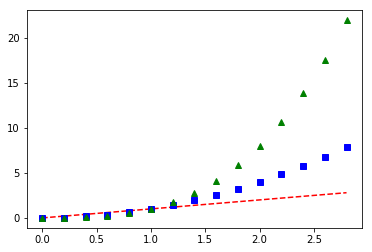

In [146]:
figure, axes = plt.subplots(1,1)


X = np.arange(0, 3, .2)
Y1 = X
Y2 = X ** 2
Y3 = X ** 3

axes.plot(X, Y1, 'r--')
axes.plot(X, Y2, 'bs')
axes.plot(X, Y3, 'g^')

plt.show()

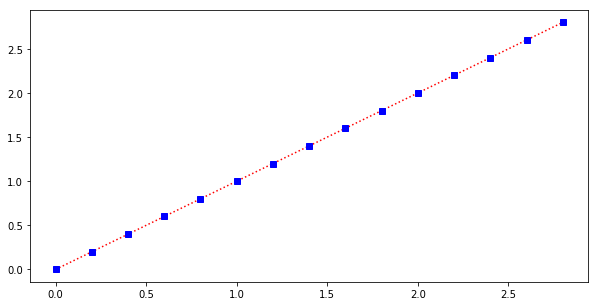

In [147]:
fig, ax = plt.subplots(figsize = (10,5))

X = np.arange(0,3,.2)
Y1 = X
ax.plot(X,Y1,color = 'red', linestyle=':')
ax.plot(X,Y1,'bs') #blue and square
#ax.plot(X,Y2,color = 'yellow', linestyle = 'g')

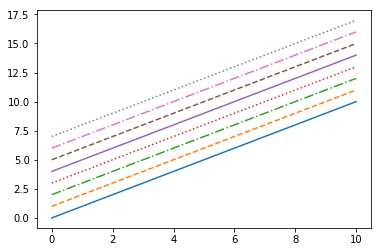

In [148]:
x = np.linspace(0, 10, 1000)
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

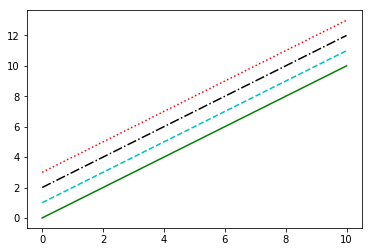

In [149]:
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r');  # dotted red


While most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between MATLAB-style functions and object-oriented methods, make the following changes:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

In the object-oriented interface to plotting, rather than calling these functions individually, it is often more convenient to use the ``ax.set()`` method to set all these properties at once:

More info in http://nbviewer.jupyter.org/github/WeatherGod/AnatomyOfMatplotlib/blob/master/AnatomyOfMatplotlib-Part3-HowToSpeakMPL.ipynb

### Histograms

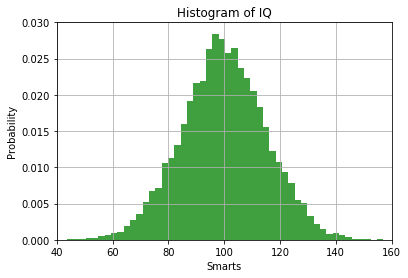

In [150]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

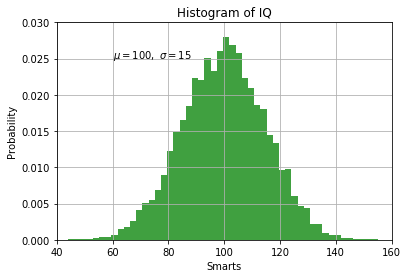

In [151]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(x, 50, density=1, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, '$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

[About font families](https://www.oreilly.com/library/view/matplotlib-2x-by/9781788295260/9af01705-e09c-4d1e-a036-ca0260d5003b.xhtml)

## Legends

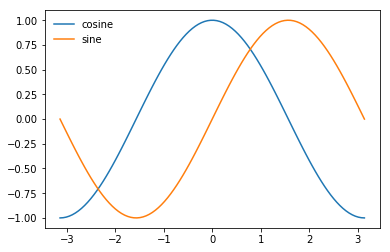

In [159]:
plt.plot(x,c, label='cosine');
plt.plot(x,s, label='sine');
plt.legend(loc = 'best', frameon = False)

plt.show()

__Exercises__

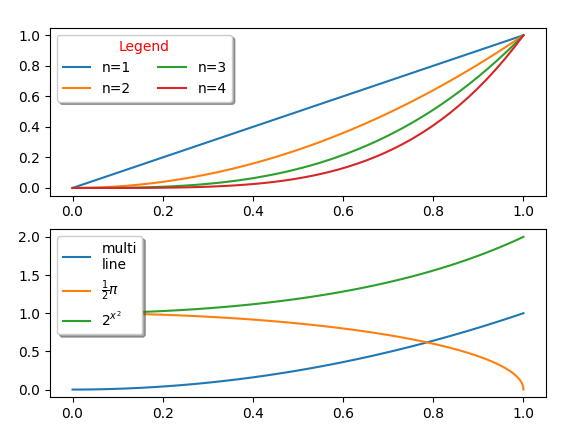

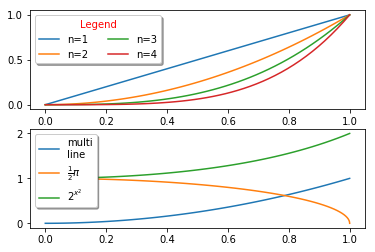

In [160]:
x = np.linspace(0, 1)

fig, (ax0, ax1) = plt.subplots(2, 1)

# Plot the lines y=x**n for n=1..4.
for n in range(1, 5):
    ax0.plot(x, x**n, label="n={0}".format(n))
leg = ax0.legend(loc="upper left", bbox_to_anchor=[0, 1],
                 ncol=2, shadow=True, title="Legend", fancybox=True)
leg.get_title().set_color("red")

# Demonstrate some more complex labels.
ax1.plot(x, x**2, label="multi\nline")
half_pi = np.linspace(0, np.pi / 2)
ax1.plot(np.sin(half_pi), np.cos(half_pi), label=r"$\frac{1}{2}\pi$")
ax1.plot(x, 2**(x**2), label="$2^{x^2}$")
ax1.legend(shadow=True, fancybox=True)

plt.show()

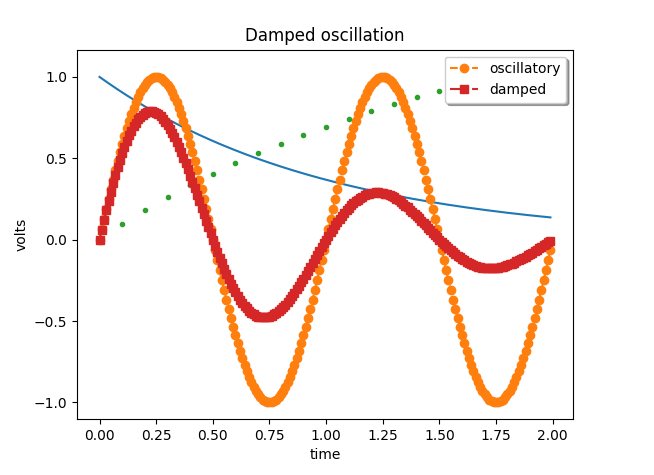

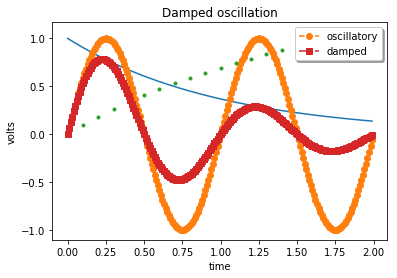

In [161]:
t1 = np.arange(0.0, 2.0, 0.1)
t2 = np.arange(0.0, 2.0, 0.01)

fig, ax = plt.subplots()

# note that plot returns a list of lines.  The "l1, = plot" usage
# extracts the first element of the list into l1 using tuple
# unpacking.  So l1 is a Line2D instance, not a sequence of lines
l1, = ax.plot(t2, np.exp(-t2))
l2, l3 = ax.plot(t2, np.sin(2 * np.pi * t2), '--o', t1, np.log(1 + t1), '.')
l4, = ax.plot(t2, np.exp(-t2) * np.sin(2 * np.pi * t2), 's-.')

ax.legend((l2, l4), ('oscillatory', 'damped'), loc='upper right', shadow=True)
ax.set_xlabel('time')
ax.set_ylabel('volts')
ax.set_title('Damped oscillation')
plt.show()

### Styles

In [162]:
plt.style.available

['seaborn-dark-palette',
 'seaborn-notebook',
 'fivethirtyeight',
 'seaborn-dark',
 'fast',
 'Solarize_Light2',
 'grayscale',
 'seaborn',
 'seaborn-muted',
 'seaborn-colorblind',
 'seaborn-darkgrid',
 'tableau-colorblind10',
 'seaborn-whitegrid',
 'seaborn-bright',
 'seaborn-paper',
 'classic',
 'seaborn-white',
 'seaborn-talk',
 'dark_background',
 'ggplot',
 'seaborn-ticks',
 'bmh',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-deep',
 '_classic_test']

In [181]:
plt.style.use('ggplot')

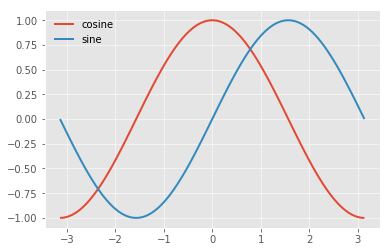

In [182]:
x = np.linspace(-np.pi, np.pi, 100)
c,s = np.cos(X), np.sin(X)

plt.plot(x,c, label='cosine');
plt.plot(x,s, label='sine');
plt.legend(loc = 'best', frameon = False)

plt.show()

In [183]:
plt.style.use(['fivethirtyeight','dark_background'])

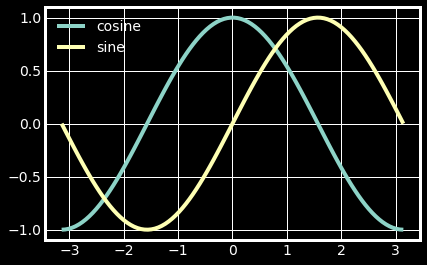

In [184]:
plt.plot(x,c, label='cosine');
plt.plot(x,s, label='sine');
plt.legend(loc = 'best', frameon = False)

plt.show()

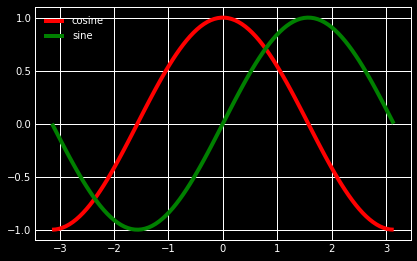

In [185]:
# how to use the styling just temporary
X = np.linspace(-np.pi, np.pi, 100)
C,S = np.cos(X), np.sin(X)


with plt.style.context(['ggplot','dark_background']):
    plt.plot(X,C, label='cosine',color='red')
    plt.plot(X,S, label='sine',color='green')
    plt.legend(loc='best', frameon=False)

Using rcParams we can access these properties 

In [14]:
import matplotlib as mp

mp.rcParams

/home/dsc/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

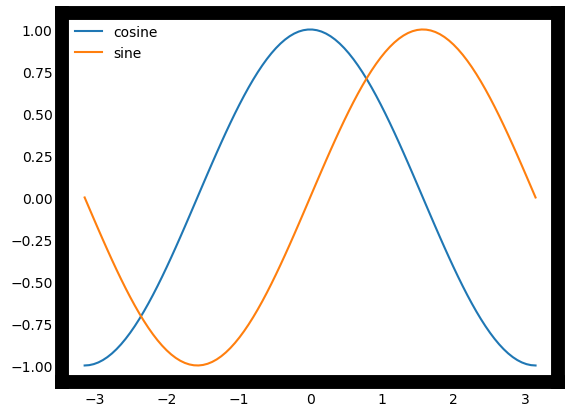

In [191]:
plt.style.use({"axes.linewidth":10})

plt.plot(x,c, label='cosine');
plt.plot(x,s, label='sine');
plt.legend(loc = 'best', frameon = False)

In [197]:
plt.style.use(['default','default'])

## Ticks, tick labels and limits

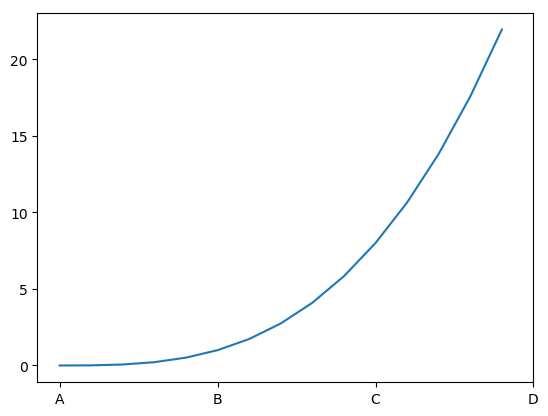

In [198]:
figure, axes = plt.subplots(1,1)

X = np.arange(0, 3, .2)
Y = X ** 3

axes.plot(X, Y)
axes.set_xticks(range(4))
axes.set_xticklabels(list('ABCD'))

plt.show()

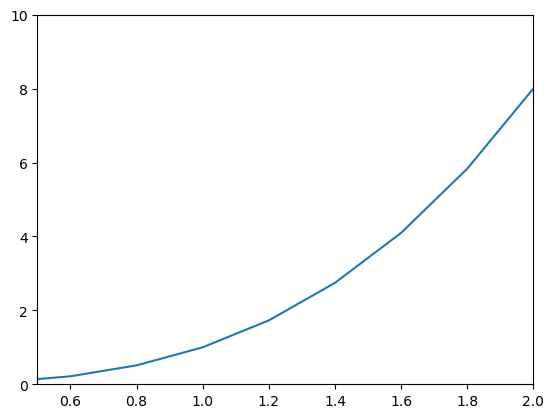

In [199]:
plt.plot(X, Y)

axes = plt.gca()
axes.set_xlim((0.5,2))
axes.set_ylim((0,10))

plt.show()

### Axis scale

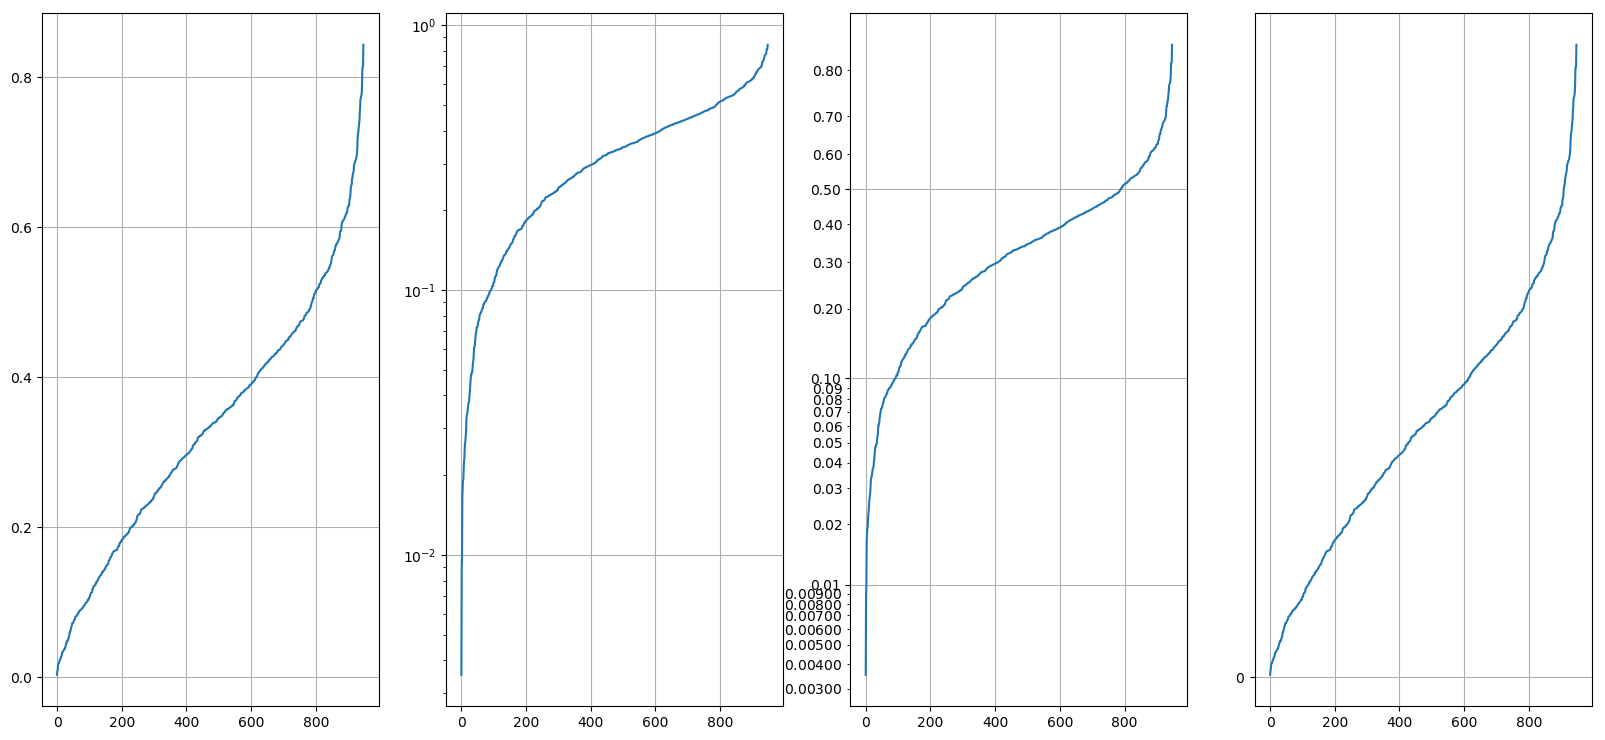

In [200]:
y = np.random.normal(loc=0.3, scale=0.2, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))
fig,ax=plt.subplots( 1,4,figsize=(20,9))

ax[0].plot(x,y)
ax[0].grid()

ax[1].plot(x,y)
ax[1].set_yscale('log')
ax[1].grid()

ax[2].plot(x,y)
ax[2].set_yscale('logit')
ax[2].grid()

ax[3].plot(x,y)
ax[3].set_yscale('symlog')
ax[3].grid()

Use `savefig()` command

## Pie Chart

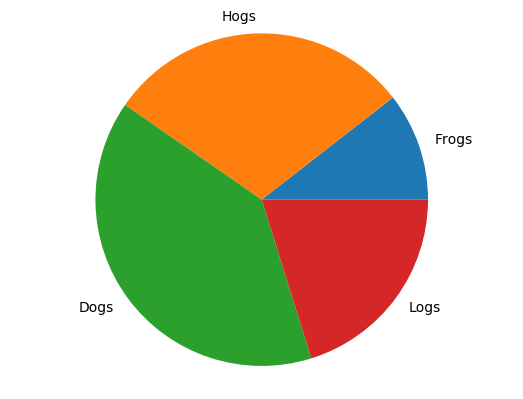

In [209]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [12, 34, 45, 23]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels)
ax1.axis('equal'); # Equal aspect ratio ensures that pie is drawn as a circle.

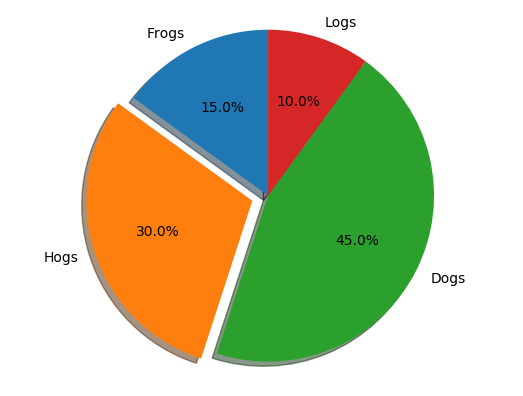

In [210]:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal');  # Equal aspect ratio ensures that pie is drawn as a circle.

Text(0.5, 1.0, 'Pie Chart Example')

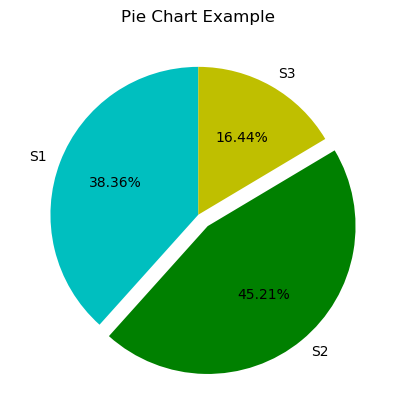

In [211]:
labels = 'S1', 'S2', 'S3'
sections = [56, 66, 24]
colors = ['c', 'g', 'y']

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1, 0),
        autopct = '%1.2f%%')

#plt.axis('equal') # Try commenting this out.
plt.title('Pie Chart Example')
#plt.show()

## Error bars

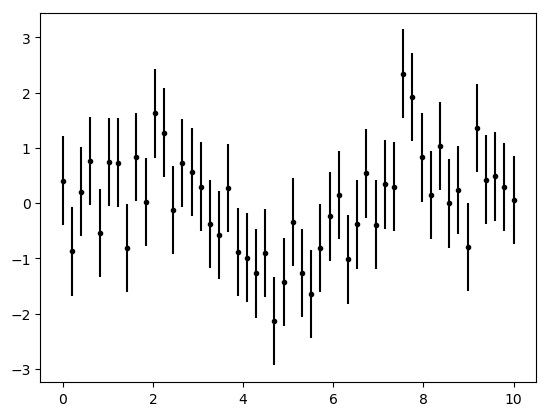

In [212]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k');

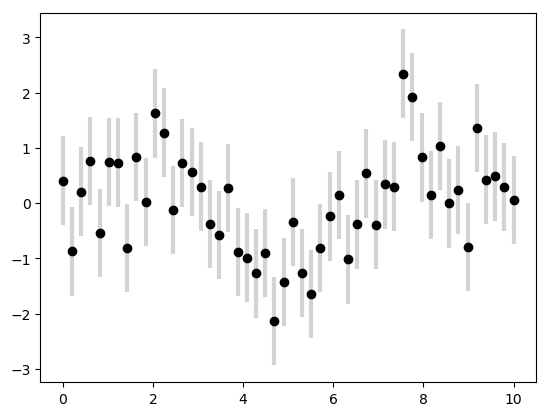

In [213]:
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0);

## 3D plots

In [ ]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [214]:
#Main example
x = np.linspace(-2*np.pi,2*np.pi);
y = np.linspace(0,4*np.pi);
[X,Y] = np.meshgrid(x,y);
Z = np.sin(X)+np.cos(Y);

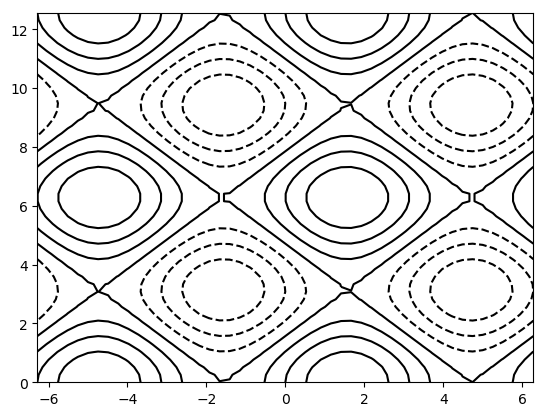

In [215]:
plt.contour(X, Y, Z, colors='black');
# dashed lines are negative values

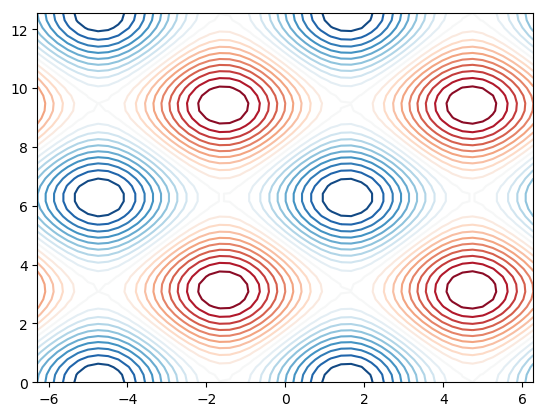

In [216]:
plt.contour(X, Y, Z,levels=20, cmap='RdBu');
# red blue colormap 
# 20 equally spaced intervals within the data range

https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

The spaces between lines may not be the best solution, so we can fill the contour plot using plt.contourf()

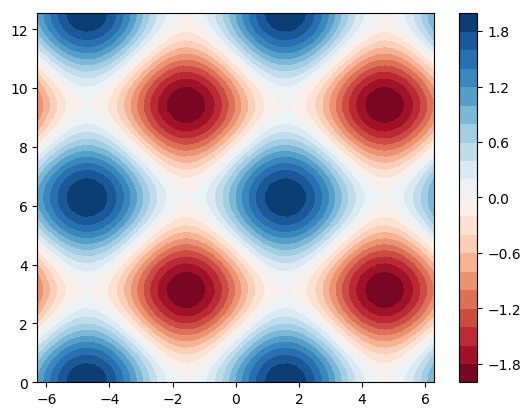

In [218]:
plt.contourf(X, Y, Z,levels=20, cmap='RdBu');
plt.colorbar()

The color steps are discrete, we can make it continuous or changing the levels or using plt.imshow() which interprets the 2-d grid of data as an image

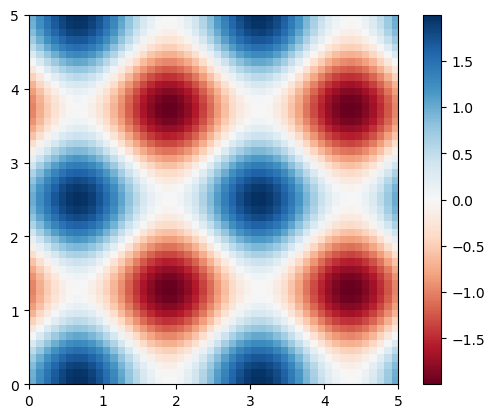

In [220]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdBu')
plt.colorbar()
plt.axis(aspect='image');

There are a few potential gotchas with ``imshow()``, however:

- ``plt.imshow()`` doesn't accept an *x* and *y* grid, so you must manually specify the *extent* [*xmin*, *xmax*, *ymin*, *ymax*] of the image on the plot.
- ``plt.imshow()`` by default follows the standard image array definition where the origin is in the upper left, not in the lower left as in most contour plots. This must be changed when showing gridded data.
- ``plt.imshow()`` will automatically adjust the axis aspect ratio to match the input data; this can be changed by setting, for example, ``plt.axis(aspect='image')`` to make *x* and *y* units match.

In [1]:
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib.ticker import LinearLocator, FormatStrFormatter

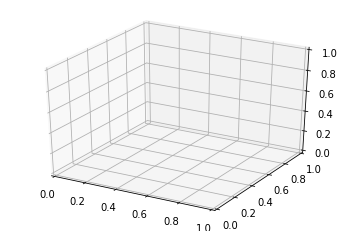

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')

# %matplotlib notebook

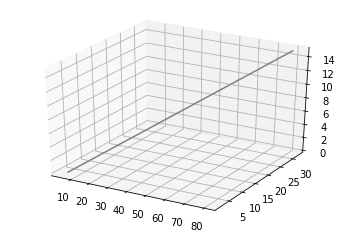

In [9]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = zline*5+5
yline = zline*2+2
ax.plot3D(xline, yline, zline, 'gray');

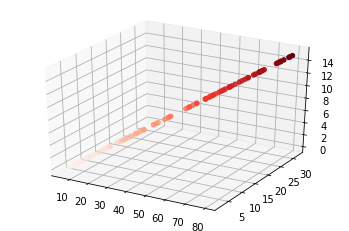

In [10]:
ax = plt.axes(projection='3d')


# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = zdata*5+5
ydata = zdata*2+2
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Reds');

__Exercise__


Drag the following:

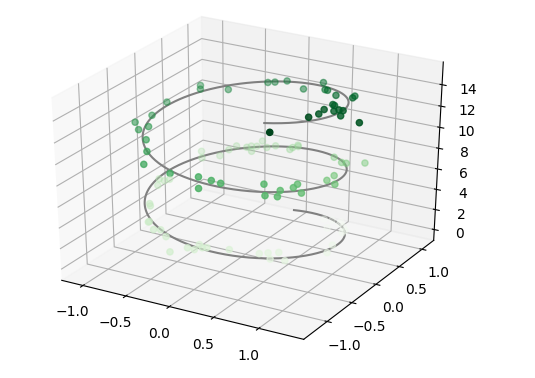

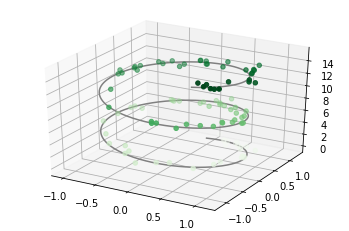

In [11]:
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens');

### Contour 3D plot

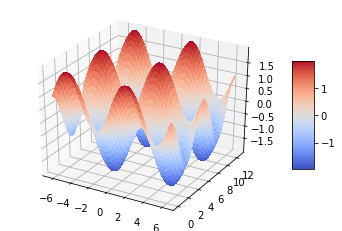

In [51]:
x = np.linspace(-2*np.pi,2*np.pi);
y = np.linspace(0,4*np.pi);
[X,Y] = np.meshgrid(x,y);
Z = np.sin(X)+np.cos(Y);

fig = plt.figure()
ax = plt.axes(projection='3d')


# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5);

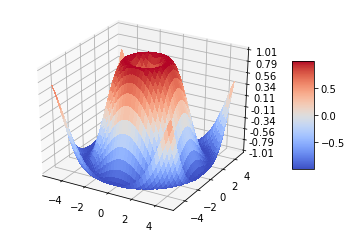

In [53]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5);

# Other libraries

## Bokeh

Bokeh "is a Python interactive visualization library that targets
modern web browsers for presentation". 

Two components: A Python backend and a JS frontend. 

The way we use it is to declare our graphs in Python. 

The Python objects will in turn generate a series of JSON objects that describe a _scenegraph_. The JS component will generate the actual visualization from that scenegraph. The upside of this is that we don't need to work with JS, but our visualizations will be browser-based and interactive

https://bokeh.pydata.org/en/latest/docs/gallery.html

https://bokeh.pydata.org/en/latest/

## Plotly

https://www.analyticsvidhya.com/blog/2017/01/beginners-guide-to-create-beautiful-interactive-data-visualizations-using-plotly-in-r-and-python/

Plotly is a multi-language tool for creating interactive visualizations. It's built on top  of D3.

https://plotly.com/python/

## Dash



"Shiny for Python" 

https://plotly.com/dash/

## Vega

http://vega.github.io/

## Additional references

[Matplotlib documentation](http://matplotlib.org/contents.html)

[The matplotlib FAQ](http://matplotlib.org/faq/usage_faq.html)

[Matplotlib cheat sheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf)

[Nicolas P. Rougier's matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/)

[Anatomy of Matplotlib](https://github.com/matplotlib/AnatomyOfMatplotlib)

[$\LaTeX$](https://www.latex-project.org/)

[Python graph gallery](https://python-graph-gallery.com/)

[Effective matplotlib](https://pbpython.com/effective-matplotlib.html)

[Python Data Science Handbook](https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/Index.ipynb)

[more plots](https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/)

https://www.datacamp.com/community/tutorials/seaborn-python-tutorial

[Bokeh User Guide](http://bokeh.pydata.org/en/latest/docs/user_guide.html)

[Bokeh Tutorials](http://nbviewer.jupyter.org/github/bokeh/bokeh-notebooks/blob/master/index.ipynb)

[Dash](https://plot.ly/dash/)

[Dash being spotted before release](https://www.reddit.com/r/Python/comments/6imhxa/plotly_has_just_released_dash_20_a_shinylike_tool/)

[Facets](https://pair-code.github.io/facets/)

[Facets release Google research blog entry](https://research.googleblog.com/2017/07/facets-open-source-visualization-tool.html)